In [0]:
from google.colab import files 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

from tensorflow.keras import utils
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Embedding, Flatten, Activation
from tensorflow.keras.layers import Conv1D, SpatialDropout1D, MaxPooling1D, GlobalAveragePooling1D, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, Bidirectional
from tensorflow.python.keras.optimizers import Adam, RMSprop

from keras.preprocessing.text import Tokenizer, text_to_word_sequence 
from sklearn.model_selection import train_test_split 

In [6]:
from google.colab import drive
drive.mount('/content/drive',  force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
def read_text(file_name): 
  f = open(file_name, 'r')
  text = f.read()        
  text = text.replace("\n", " ") 
  
  return text                    

train_text = []
train_text.append(read_text('/content/drive/My Drive/Поэты/Пушкин/pushkin1.txt'))
train_text.append(read_text('/content/drive/My Drive/Поэты/Лермонтов/lerm1.txt'))
train_text.append(read_text('/content/drive/My Drive/Поэты/Шекспир/sh1.txt'))
train_text.append(read_text('/content/drive/My Drive/Поэты/Есенин/es1.txt'))
train_text.append(read_text('/content/drive/My Drive/Поэты/Маяковский/m1.txt'))

class_name = ["Пушкин", "Лермонтов", "Шекспир", "Есенин", "Маяковский"]
n_classes = len(class_name)

test_text = []
test_text.append(read_text('/content/drive/My Drive/Поэты/Пушкин/pushkin2.txt'))
test_text.append(read_text('/content/drive/My Drive/Поэты/Лермонтов/lerm2.txt'))
test_text.append(read_text('/content/drive/My Drive/Поэты/Шекспир/sh2.txt'))
test_text.append(read_text('/content/drive/My Drive/Поэты/Есенин/es2.txt'))
test_text.append(read_text('/content/drive/My Drive/Поэты/Маяковский/m2.txt'))


In [8]:
len(test_text)

5

In [0]:
max_words_count = 20000

tokenizer = Tokenizer(num_words=max_words_count, filters='–—!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n\xa0–\ufeff', lower=True, split=' ', char_level=False, oov_token = 'unknown')

tokenizer.fit_on_texts(train_text)
items = list(tokenizer.word_index.items()) 

In [10]:
print(items[:100]) # взглянем на содержимое словаря

[('unknown', 9979), ('и', 2), ('в', 3), ('не', 4), ('я', 5), ('на', 6), ('с', 7), ('как', 8), ('ты', 9), ('что', 10), ('но', 11), ('он', 12), ('мне', 13), ('о', 14), ('все', 15), ('к', 16), ('а', 17), ('за', 18), ('то', 19), ('так', 20), ('по', 21), ('его', 22), ('когда', 23), ('от', 24), ('мой', 25), ('меня', 26), ('где', 27), ('у', 28), ('x', 29), ('из', 30), ('and', 31), ('для', 32), ('их', 33), ('тебя', 34), ('под', 35), ('the', 36), ('to', 37), ('кто', 38), ('нет', 39), ('она', 40), ('ни', 41), ('тебе', 42), ('был', 43), ('of', 44), ('же', 45), ('мы', 46), ('my', 47), ('i', 48), ('ли', 49), ('над', 50), ('любви', 51), ('ее', 52), ('твой', 53), ('that', 54), ('in', 55), ('без', 56), ('бы', 57), ('вы', 58), ('если', 59), ('вот', 60), ('там', 61), ('уж', 62), ('сердце', 63), ('лишь', 64), ('моей', 65), ('это', 66), ('любовь', 67), ('во', 68), ('ж', 69), ('thy', 70), ('до', 71), ('друг', 72), ('только', 73), ('моя', 74), ('ль', 75), ('да', 76), ('thou', 77), ('быть', 78), ('чтоб', 79)

In [11]:
print("Протестируем словарь частотности")
print("Интересующее слово имеет индекс: ", tokenizer.word_index[input("уточните слово: ")]) #протестируем словарь частотности

Протестируем словарь частотности
уточните слово: он
Интересующее слово имеет индекс:  12


In [12]:
train_word_indexes = tokenizer.texts_to_sequences(train_text) 
test_word_indexes = tokenizer.texts_to_sequences(test_text)   

print("Взглянем на фрагмент обучающего текста:")
print("В виде оригинального текста:              ", train_text[1] [:87])
print("Он же в виде последовательности индексов: ", train_word_indexes[1][:20])

print()
print()

print("Статистика по обучающим текстам:")
for i in range(n_classes):
  print(class_name[i], " ", len(train_text[i]), " символов, ", len(train_word_indexes[i]), " слов")
print("В сумме ", len(train_text[0])+len(train_text[1]), " символов, ", len(train_word_indexes[0])+len(train_word_indexes[1]), " слов")
print()
print("Статистика по проверочным текстам:")
for i in range(n_classes):
  print(class_name[i], " ", len(test_text[i]), " символов, ", len(test_word_indexes[i]), " слов")
print("В сумме ", len(test_text[0])+len(test_text[1]), " символов, ", len(test_word_indexes[0])+len(test_word_indexes[1]), " слов")

Взглянем на фрагмент обучающего текста:
В виде оригинального текста:                Михаил Юрьевич Лермонтов. Стихотворения               СТИХОТВОРЕНИЯ      1837-1841    
Он же в виде последовательности индексов:  [9979, 9979, 13314, 1785, 1785, 13315, 13316, 13315, 216, 371, 1945, 164, 5005, 992, 718, 9979, 4915, 7, 13317, 3]


Статистика по обучающим текстам:
Пушкин   419974  символов,  64855  слов
Лермонтов   441371  символов,  62445  слов
Шекспир   248182  символов,  37451  слов
Есенин   231578  символов,  24694  слов
Маяковский   204845  символов,  15559  слов
В сумме  861345  символов,  127300  слов

Статистика по проверочным текстам:
Пушкин   187683  символов,  29607  слов
Лермонтов   218522  символов,  30837  слов
Шекспир   106108  символов,  10286  слов
Есенин   5263  символов,  553  слов
Маяковский   92434  символов,  6693  слов
В сумме  406205  символов,  60444  слов


In [0]:
###########################
# Формирование обучающей выборки по листу индексов слов
# (разделение на короткие векторы)
##########################
def get_set_from_indexes(word_indexes, x_len, step):
  x_sample = []
  words_len = len(word_indexes)
  index = 0
  
  while (index + x_len <= words_len):
    x_sample.append(word_indexes[index:index+x_len])
    index += step
    
  return x_sample

In [0]:
###########################
# Формирование обучающей и проверочной выборки
# Из двух листов индексов от двух классов
##########################
def create_sets_multi_classes(word_indexes, x_len, step): 

  n_classes = len(word_indexes) 
  classes_x_samples = []        
  for wI in word_indexes:      
    classes_x_samples.append(get_set_from_indexes(wI, x_len, step)) 

  x_samples = []
  y_samples = []
  
  for t in range(n_classes): 
    xT = classes_x_samples[t]  
    for i in range(len(xT)): 
      x_samples.append(xT[i]) 
    
    # Формируем ySamples по номеру класса
    currY = utils.to_categorical(t, n_classes) # текущий класс переводится в вектор длиной 6 вида [0.0.0.1.0.0.]
    for i in range(len(xT)): # на каждое окно выборки 
      y_samples.append(currY) # добавляем соответствующий вектор класса

  x_samples = np.array(x_samples)
  y_samples = np.array(y_samples)

  
  return (x_samples, y_samples)  

In [0]:
x_len = 200 
step = 10 

In [16]:
# Формируем обучающую и тестовую выборку
x_train, y_train = create_sets_multi_classes(train_word_indexes, x_len, step) # извлекаем обучающую выборку
x_test, y_test = create_sets_multi_classes(test_word_indexes, x_len, step)    # извлекаем тестовую выборку
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
# получили обучающий/тестовый набор, достаточный для запуска Embedding, но для Bag of Words нужно xTrain и xTest представить в виде векторов из 0 и 1

(20403, 200)
(20403, 5)
(7700, 200)
(7700, 5)


In [0]:
###########################
# Представляем тестовую выборку в удобных для распознавания размерах
##########################
def create_test_multi_classes(word_indexes, x_len, step): 

  n_classes = len(word_indexes) 
  x_test2_classes01 = []        
  x_test2_classes = []          
  for wI in word_indexes:       
    sample = (get_set_from_indexes(wI, x_len, step)) 
    x_test2_classes.append(np.array(sample))       
    x_test2_classes01.append(tokenizer.sequences_to_matrix(sample)) 
  x_test2_classes01 = np.array(x_test2_classes01)                   
  
  return x_test2_classes01, x_test2_classes

###########################
# Расспознаём тестовую выборку и выводим результаты
##########################
def recognize_multi_class(model, x_test, model_name):
  print("НЕЙРОНКА: ", model_name)
  print()
  
  val = []
  pred = []
  
  totalSumRec = []
  
  for i in range(n_classes):
    currPred = model.predict(x_test[i])
    pred.append(currPred)
    currOut = np.argmax(currPred, axis=1)
    
    evVal = []
    sumRec = []
    for j in range(n_classes):
      sumRec.append(0)
      for t in range(len(currOut)):
        if (currOut[t] == j):
          sumRec[j] += 1
      evVal.append(sumRec[j] / len(currOut))
    
    totalSumRec.append(sumRec[i])
    
    val.append(evVal[i])
    recognizedClass = np.argmax(evVal)
    
    isRecognized = "распознано НЕ ВЕРНО!"
    if (recognizedClass == i):
      isRecognized = "распознано ВЕРНО!"
    print(class_name[i], " распознано ", int(100*evVal[i]), "% сеть считает, что это ", class_name[recognizedClass], ", ", isRecognized)
  
  # Выводим вредний процент распознавания по всем классам вместе
  print()
  sumVal = 0
  sumCount = 0
  lenXtest = []
  for i in range(n_classes):
    sumCount += len(x_test[i])
    sumVal += totalSumRec[i]
  print("Средний процент распознавания ", int(100*sumVal/sumCount), "%")
  print()
  return sumVal/sumCount

xTest2Classes01, xTest2Classes = create_test_multi_classes(test_word_indexes, x_len, step) # подгоним форму тестовых классов под функцию recognizeMultiClass

## Рекуррентная нейросеть

Epoch 1/30
40/40 [==============================] - 7s 184ms/step - loss: 1.6554 - accuracy: 0.1997 - val_loss: 1.5757 - val_accuracy: 0.3922
Epoch 2/30
40/40 [==============================] - 7s 179ms/step - loss: 1.5809 - accuracy: 0.2731 - val_loss: 1.5498 - val_accuracy: 0.3964
Epoch 3/30
40/40 [==============================] - 7s 176ms/step - loss: 1.5338 - accuracy: 0.3200 - val_loss: 1.5247 - val_accuracy: 0.3839
Epoch 4/30
40/40 [==============================] - 7s 177ms/step - loss: 1.5002 - accuracy: 0.3347 - val_loss: 1.4992 - val_accuracy: 0.3953
Epoch 5/30
40/40 [==============================] - 7s 185ms/step - loss: 1.4664 - accuracy: 0.3479 - val_loss: 1.4730 - val_accuracy: 0.3923
Epoch 6/30
40/40 [==============================] - 7s 177ms/step - loss: 1.4343 - accuracy: 0.3654 - val_loss: 1.4504 - val_accuracy: 0.3964
Epoch 7/30
40/40 [==============================] - 7s 177ms/step - loss: 1.4067 - accuracy: 0.3829 - val_loss: 1.4289 - val_accuracy: 0.4014
Epoch 

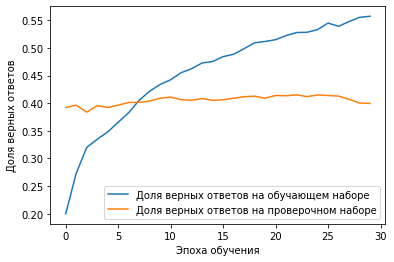

НЕЙРОНКА:  SimpleRNN

Пушкин  распознано  52 % сеть считает, что это  Пушкин ,  распознано ВЕРНО!
Лермонтов  распознано  43 % сеть считает, что это  Пушкин ,  распознано НЕ ВЕРНО!
Шекспир  распознано  10 % сеть считает, что это  Пушкин ,  распознано НЕ ВЕРНО!
Есенин  распознано  0 % сеть считает, что это  Пушкин ,  распознано НЕ ВЕРНО!
Маяковский  распознано  14 % сеть считает, что это  Пушкин ,  распознано НЕ ВЕРНО!

Средний процент распознавания  39 %



In [19]:
modelEL = Sequential()

modelEL.add(Embedding(max_words_count, 5, input_length=x_len))

modelEL.add(SpatialDropout1D(0.2)) 
modelEL.add(BatchNormalization()) 
modelEL.add(SimpleRNN(4, dropout=0.2, recurrent_dropout=0.2, activation="relu"))
modelEL.add(Dense(5, activation='softmax')) 

modelEL.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = modelEL.fit(x_train, 
                    y_train, 
                    epochs=30,
                    batch_size=512,
                    validation_data=(x_test, y_test))

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

pred = recognize_multi_class(modelEL, xTest2Classes, "SimpleRNN") #функция покажет какие классы и как распознаны верно

Epoch 1/30
40/40 [==============================] - 21s 536ms/step - loss: 1.5952 - accuracy: 0.2439 - val_loss: 1.5591 - val_accuracy: 0.3861
Epoch 2/30
40/40 [==============================] - 21s 535ms/step - loss: 1.4647 - accuracy: 0.3942 - val_loss: 1.5010 - val_accuracy: 0.4316
Epoch 3/30
40/40 [==============================] - 22s 538ms/step - loss: 1.3351 - accuracy: 0.4563 - val_loss: 1.4422 - val_accuracy: 0.4286
Epoch 4/30
40/40 [==============================] - 21s 533ms/step - loss: 1.2121 - accuracy: 0.4966 - val_loss: 1.3945 - val_accuracy: 0.4265
Epoch 5/30
40/40 [==============================] - 21s 532ms/step - loss: 1.0535 - accuracy: 0.5616 - val_loss: 1.3738 - val_accuracy: 0.4504
Epoch 6/30
40/40 [==============================] - 22s 541ms/step - loss: 0.9362 - accuracy: 0.6080 - val_loss: 1.3843 - val_accuracy: 0.4731
Epoch 7/30
40/40 [==============================] - 21s 532ms/step - loss: 0.8338 - accuracy: 0.6597 - val_loss: 1.4119 - val_accuracy: 0.4466

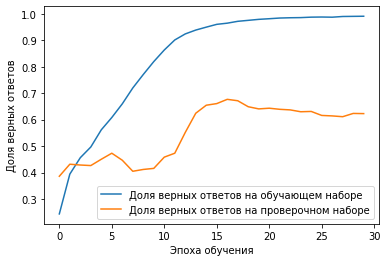

НЕЙРОНКА:  Embedding + LSTM

Пушкин  распознано  82 % сеть считает, что это  Пушкин ,  распознано ВЕРНО!
Лермонтов  распознано  58 % сеть считает, что это  Лермонтов ,  распознано ВЕРНО!
Шекспир  распознано  0 % сеть считает, что это  Пушкин ,  распознано НЕ ВЕРНО!
Есенин  распознано  58 % сеть считает, что это  Есенин ,  распознано ВЕРНО!
Маяковский  распознано  86 % сеть считает, что это  Маяковский ,  распознано ВЕРНО!

Средний процент распознавания  62 %



In [20]:
modelEL = Sequential()

modelEL.add(Embedding(max_words_count, 5, input_length=x_len))

modelEL.add(SpatialDropout1D(0.2))
modelEL.add(BatchNormalization()) 
modelEL.add(GRU(4, dropout=0.2, recurrent_dropout=0.2, activation="relu"))
modelEL.add(Dense(5, activation='softmax')) 

modelEL.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = modelEL.fit(x_train, 
                    y_train, 
                    epochs=30,
                    batch_size=512,
                    validation_data=(x_test, y_test))

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

pred = recognize_multi_class(modelEL, xTest2Classes, "Embedding + LSTM") #функция покажет какие классы и как распознаны верно

Epoch 1/30
319/319 [==============================] - 4s 13ms/step - loss: 1.3116 - accuracy: 0.4413 - val_loss: 1.3722 - val_accuracy: 0.3816
Epoch 2/30
319/319 [==============================] - 4s 12ms/step - loss: 0.9724 - accuracy: 0.5510 - val_loss: 1.4124 - val_accuracy: 0.3779
Epoch 3/30
319/319 [==============================] - 4s 12ms/step - loss: 0.8164 - accuracy: 0.6410 - val_loss: 1.3933 - val_accuracy: 0.4092
Epoch 4/30
319/319 [==============================] - 4s 12ms/step - loss: 0.7404 - accuracy: 0.6774 - val_loss: 1.4748 - val_accuracy: 0.4238
Epoch 5/30
319/319 [==============================] - 4s 12ms/step - loss: 0.6751 - accuracy: 0.7543 - val_loss: 1.4356 - val_accuracy: 0.5247
Epoch 6/30
319/319 [==============================] - 4s 12ms/step - loss: 0.5555 - accuracy: 0.8413 - val_loss: 1.2942 - val_accuracy: 0.6053
Epoch 7/30
319/319 [==============================] - 4s 12ms/step - loss: 0.4761 - accuracy: 0.8621 - val_loss: 1.2993 - val_accuracy: 0.6134

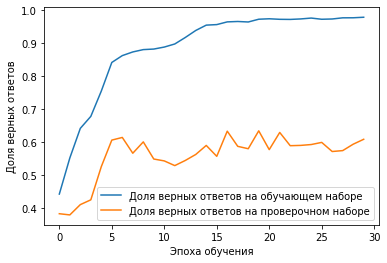

НЕЙРОНКА:  Embedding + LSTM

Пушкин  распознано  40 % сеть считает, что это  Лермонтов ,  распознано НЕ ВЕРНО!
Лермонтов  распознано  97 % сеть считает, что это  Лермонтов ,  распознано ВЕРНО!
Шекспир  распознано  0 % сеть считает, что это  Лермонтов ,  распознано НЕ ВЕРНО!
Есенин  распознано  94 % сеть считает, что это  Есенин ,  распознано ВЕРНО!
Маяковский  распознано  73 % сеть считает, что это  Маяковский ,  распознано ВЕРНО!

Средний процент распознавания  60 %



In [21]:
modelEL = Sequential() 

modelEL.add(Embedding(max_words_count, 5, input_length=x_len))

modelEL.add(SpatialDropout1D(0.2))
modelEL.add(BatchNormalization()) 
modelEL.add(LSTM(4))
modelEL.add(Dense(5, activation='softmax')) 

modelEL.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Обучаем сеть с указанием тренировочной выборки, количества эпох, размера минибатча для подачи сети, и тестовой выборки
history = modelEL.fit(x_train, 
                    y_train, 
                    epochs=30,
                    batch_size=64,
                    validation_data=(x_test, y_test))

# Строим график для отображения динамики обучения и точности предсказания сети
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

pred = recognize_multi_class(modelEL, xTest2Classes, "Embedding + LSTM") #функция покажет какие классы и как распознаны верно

Epoch 1/50
40/40 [==============================] - 2s 41ms/step - loss: 1.5287 - accuracy: 0.3701 - val_loss: 1.4735 - val_accuracy: 0.3819
Epoch 2/50
40/40 [==============================] - 1s 27ms/step - loss: 1.3520 - accuracy: 0.4623 - val_loss: 1.3863 - val_accuracy: 0.3821
Epoch 3/50
40/40 [==============================] - 1s 27ms/step - loss: 1.1933 - accuracy: 0.4999 - val_loss: 1.3366 - val_accuracy: 0.3819
Epoch 4/50
40/40 [==============================] - 1s 27ms/step - loss: 1.0730 - accuracy: 0.5122 - val_loss: 1.2900 - val_accuracy: 0.3822
Epoch 5/50
40/40 [==============================] - 1s 27ms/step - loss: 0.9933 - accuracy: 0.5179 - val_loss: 1.2830 - val_accuracy: 0.3299
Epoch 6/50
40/40 [==============================] - 1s 28ms/step - loss: 0.9308 - accuracy: 0.5528 - val_loss: 1.2851 - val_accuracy: 0.3161
Epoch 7/50
40/40 [==============================] - 1s 28ms/step - loss: 0.8706 - accuracy: 0.6943 - val_loss: 1.2924 - val_accuracy: 0.3731
Epoch 8/50
40

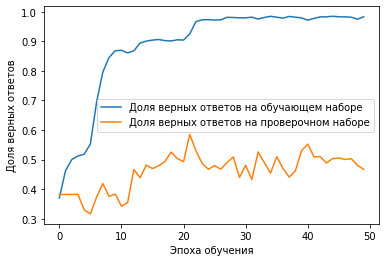

НЕЙРОНКА:  Embedding + LSTM

Пушкин  распознано  17 % сеть считает, что это  Лермонтов ,  распознано НЕ ВЕРНО!
Лермонтов  распознано  97 % сеть считает, что это  Лермонтов ,  распознано ВЕРНО!
Шекспир  распознано  4 % сеть считает, что это  Лермонтов ,  распознано НЕ ВЕРНО!
Есенин  распознано  33 % сеть считает, что это  Шекспир ,  распознано НЕ ВЕРНО!
Маяковский  распознано  6 % сеть считает, что это  Есенин ,  распознано НЕ ВЕРНО!

Средний процент распознавания  46 %



In [22]:
modelEL = Sequential() 


modelEL.add(Embedding(max_words_count, 5, input_length=x_len))

modelEL.add(SpatialDropout1D(0.2)) 
modelEL.add(BatchNormalization())  
modelEL.add(LSTM(4, return_sequences=1))
modelEL.add(LSTM(4))
modelEL.add(Dense(5, activation='softmax')) 

modelEL.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = modelEL.fit(x_train, 
                    y_train, 
                    epochs=50,
                    batch_size=512,
                    validation_data=(x_test, y_test))

# Строим график для отображения динамики обучения и точности предсказания сети
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

pred = recognize_multi_class(modelEL, xTest2Classes, "Embedding + LSTM") # функция покажет какие классы и как распознаны верно

Epoch 1/30
103/103 [==============================] - 2s 19ms/step - loss: 1.7959 - accuracy: 0.2621 - val_loss: 1.3759 - val_accuracy: 0.3819
Epoch 2/30
103/103 [==============================] - 2s 16ms/step - loss: 1.4623 - accuracy: 0.3542 - val_loss: 1.2491 - val_accuracy: 0.3561
Epoch 3/30
103/103 [==============================] - 2s 15ms/step - loss: 1.1286 - accuracy: 0.4493 - val_loss: 1.4226 - val_accuracy: 0.2171
Epoch 4/30
103/103 [==============================] - 2s 16ms/step - loss: 0.9740 - accuracy: 0.4834 - val_loss: 1.5869 - val_accuracy: 0.3131
Epoch 5/30
103/103 [==============================] - 2s 16ms/step - loss: 0.9116 - accuracy: 0.5062 - val_loss: 1.6152 - val_accuracy: 0.3566
Epoch 6/30
103/103 [==============================] - 2s 16ms/step - loss: 0.8668 - accuracy: 0.5304 - val_loss: 1.6158 - val_accuracy: 0.3817
Epoch 7/30
103/103 [==============================] - 2s 16ms/step - loss: 0.8260 - accuracy: 0.5576 - val_loss: 1.5334 - val_accuracy: 0.3970

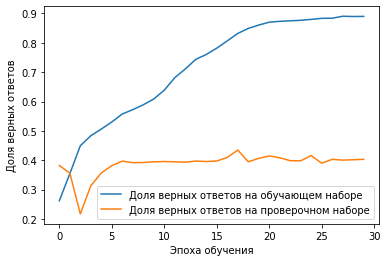

НЕЙРОНКА:  Embedding + LSTM

Пушкин  распознано  0 % сеть считает, что это  Лермонтов ,  распознано НЕ ВЕРНО!
Лермонтов  распознано  99 % сеть считает, что это  Лермонтов ,  распознано ВЕРНО!
Шекспир  распознано  0 % сеть считает, что это  Лермонтов ,  распознано НЕ ВЕРНО!
Есенин  распознано  100 % сеть считает, что это  Есенин ,  распознано ВЕРНО!
Маяковский  распознано  0 % сеть считает, что это  Есенин ,  распознано НЕ ВЕРНО!

Средний процент распознавания  40 %



In [23]:
modelEL = Sequential()

modelEL.add(Embedding(max_words_count, 10, input_length=x_len))

modelEL.add(SpatialDropout1D(0.4))
modelEL.add(BatchNormalization()) 
modelEL.add(LSTM(4))
modelEL.add(Dropout(0.5)) 
modelEL.add(BatchNormalization()) 
modelEL.add(Dense(100, activation="relu"))
modelEL.add(Dropout(0.5)) 
modelEL.add(BatchNormalization()) 
modelEL.add(Dense(5, activation='softmax'))

modelEL.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Обучаем сеть с указанием тренировочной выборки, количества эпох, размера минибатча для подачи сети, и тестовой выборки
history = modelEL.fit(x_train, 
                    y_train, 
                    epochs=30,
                    batch_size=200,
                    validation_data=(x_test, y_test))

# Строим график для отображения динамики обучения и точности предсказания сети
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

pred = recognize_multi_class(modelEL, xTest2Classes, "Embedding + LSTM") # функция покажет какие классы и как распознаны верно

Epoch 1/30
319/319 [==============================] - 5s 16ms/step - loss: 0.9806 - accuracy: 0.6880 - val_loss: 6.9768 - val_accuracy: 0.4064
Epoch 2/30
319/319 [==============================] - 5s 14ms/step - loss: 0.2317 - accuracy: 0.9414 - val_loss: 5.5547 - val_accuracy: 0.5162
Epoch 3/30
319/319 [==============================] - 5s 14ms/step - loss: 0.1754 - accuracy: 0.9622 - val_loss: 5.5856 - val_accuracy: 0.5218
Epoch 4/30
319/319 [==============================] - 5s 14ms/step - loss: 0.1641 - accuracy: 0.9650 - val_loss: 4.5117 - val_accuracy: 0.5747
Epoch 5/30
319/319 [==============================] - 5s 15ms/step - loss: 0.1375 - accuracy: 0.9685 - val_loss: 3.8447 - val_accuracy: 0.5896
Epoch 6/30
319/319 [==============================] - 5s 15ms/step - loss: 0.1299 - accuracy: 0.9714 - val_loss: 4.7238 - val_accuracy: 0.5783
Epoch 7/30
319/319 [==============================] - 5s 15ms/step - loss: 0.1125 - accuracy: 0.9745 - val_loss: 3.7420 - val_accuracy: 0.5919

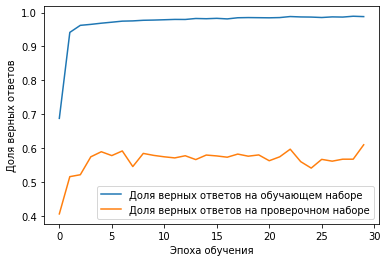

НЕЙРОНКА:  Embedding + LSTM

Пушкин  распознано  40 % сеть считает, что это  Пушкин ,  распознано ВЕРНО!
Лермонтов  распознано  93 % сеть считает, что это  Лермонтов ,  распознано ВЕРНО!
Шекспир  распознано  0 % сеть считает, что это  Лермонтов ,  распознано НЕ ВЕРНО!
Есенин  распознано  16 % сеть считает, что это  Маяковский ,  распознано НЕ ВЕРНО!
Маяковский  распознано  98 % сеть считает, что это  Маяковский ,  распознано ВЕРНО!

Средний процент распознавания  61 %



In [24]:
modelEL = Sequential()

modelEL.add(Embedding(max_words_count, 10, input_length=x_len))

modelEL.add(SpatialDropout1D(0.4)) 
modelEL.add(BatchNormalization()) 
modelEL.add(LSTM(4, return_sequences=1)) 
modelEL.add(Dropout(0.5)) 
modelEL.add(BatchNormalization())
modelEL.add(Dense(100, activation="relu"))
modelEL.add(Dropout(0.5))
modelEL.add(BatchNormalization())
modelEL.add(Flatten()) 
modelEL.add(Dense(5, activation='softmax')) 


modelEL.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = modelEL.fit(x_train, 
                    y_train, 
                    epochs=30,
                    batch_size=64,
                    validation_data=(x_test, y_test))


plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

pred = recognize_multi_class(modelEL, xTest2Classes, "Embedding + LSTM") #функция покажет какие классы и как распознаны верно

Epoch 1/30
103/103 [==============================] - 9s 86ms/step - loss: 1.3128 - accuracy: 0.4378 - val_loss: 1.2763 - val_accuracy: 0.3979
Epoch 2/30
103/103 [==============================] - 7s 72ms/step - loss: 0.5397 - accuracy: 0.7617 - val_loss: 3.4435 - val_accuracy: 0.0842
Epoch 3/30
103/103 [==============================] - 7s 72ms/step - loss: 0.1791 - accuracy: 0.9351 - val_loss: 3.8082 - val_accuracy: 0.4491
Epoch 4/30
103/103 [==============================] - 7s 72ms/step - loss: 0.0772 - accuracy: 0.9779 - val_loss: 4.0595 - val_accuracy: 0.5275
Epoch 5/30
103/103 [==============================] - 7s 73ms/step - loss: 0.0356 - accuracy: 0.9918 - val_loss: 5.1514 - val_accuracy: 0.5082
Epoch 6/30
103/103 [==============================] - 7s 72ms/step - loss: 0.0205 - accuracy: 0.9946 - val_loss: 3.0912 - val_accuracy: 0.6358
Epoch 7/30
103/103 [==============================] - 7s 72ms/step - loss: 0.0262 - accuracy: 0.9939 - val_loss: 4.1636 - val_accuracy: 0.5796

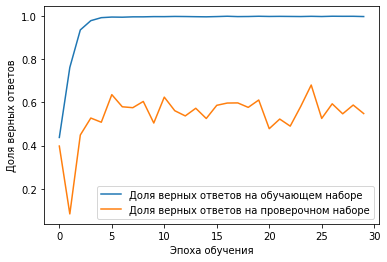

НЕЙРОНКА:  Embedding + LSTM

Пушкин  распознано  23 % сеть считает, что это  Лермонтов ,  распознано НЕ ВЕРНО!
Лермонтов  распознано  93 % сеть считает, что это  Лермонтов ,  распознано ВЕРНО!
Шекспир  распознано  0 % сеть считает, что это  Лермонтов ,  распознано НЕ ВЕРНО!
Есенин  распознано  0 % сеть считает, что это  Маяковский ,  распознано НЕ ВЕРНО!
Маяковский  распознано  100 % сеть считает, что это  Маяковский ,  распознано ВЕРНО!

Средний процент распознавания  54 %



In [25]:
modelEL = Sequential() 

modelEL.add(Embedding(max_words_count, 50, input_length=x_len))

modelEL.add(SpatialDropout1D(0.4)) 
modelEL.add(BatchNormalization()) 
modelEL.add(Bidirectional(LSTM(8, return_sequences=1)))
modelEL.add(Bidirectional(LSTM(8, return_sequences=1))) 
modelEL.add(Dropout(0.3))
modelEL.add(BatchNormalization()) 
modelEL.add(GRU(16, return_sequences=1,reset_after=True))
modelEL.add(GRU(16, reset_after=True)) 
modelEL.add(Dropout(0.3)) 
modelEL.add(BatchNormalization()) 
modelEL.add(Dense(200, activation='relu'))
modelEL.add(Dropout(0.3)) 
modelEL.add(BatchNormalization())
modelEL.add(Dense(5, activation='softmax'))


modelEL.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = modelEL.fit(x_train, 
                    y_train, 
                    epochs=30,
                    batch_size=200,
                    validation_data=(x_test, y_test))

# Строим график для отображения динамики обучения и точности предсказания сети
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

pred = recognize_multi_class(modelEL, xTest2Classes, "Embedding + LSTM") #функция покажет какие классы и как распознаны верно

**Лучшая сетка получилась Embedding + LSTM**